# Tensegrity structures

### Loading libraries and files

In [331]:
#importing libraries
import numpy as np
import copy
import matplotlib.pyplot as plt
import importlib

#importing .py files and reloading
import CableTensegrityStruct as CTS
importlib.reload(CTS)
import TensegrityStruct as TS
importlib.reload(TS)
import optimization as opt
importlib.reload(opt)
import plotting
importlib.reload(plotting)
import FreeStandingStruct as FSS
importlib.reload(FSS)

#for plotting
from matplotlib.gridspec import GridSpec
plt.rcParams['figure.dpi'] = 300

### Test example with only cables, fixed nodes

##### Initializtion of the structure

In [332]:
#Making the structure
num_of_fixed_nodes = 4

nodes = np.array([[ 5,  5,    0],
                  [-5,  5,    0],
                  [-5, -5,    0],
                  [ 5, -5,    0],
                  [-5,  8,    0],
                  [ 3, -4,    3],
                  [ 1,  3,   -2],
                  [ 3, -3,    0]]).astype(np.float64)

cables = np.array([[0, 4, 3],
                   [1, 5, 3],
                   [2, 6, 3],
                   [3, 7, 3],
                   [4, 5, 3],
                   [4, 7, 3],
                   [5, 6, 3],
                   [6, 7, 3]])

masses = np.array([[4, 1/6],
                   [5, 1/6],
                   [6, 1/6],
                   [7, 1/6]])

k = 3

struct1 = CTS.CableTensegrityStruct(num_of_fixed_nodes,nodes, masses,cables, k)

##### Applying BFGS

In [333]:
#BFGS
struct1_BFGS = copy.deepcopy(struct1)
norms1 = opt.BFGS(struct1_BFGS, return_norms=True)

BFGS used 39 iterations


##### Plotting results

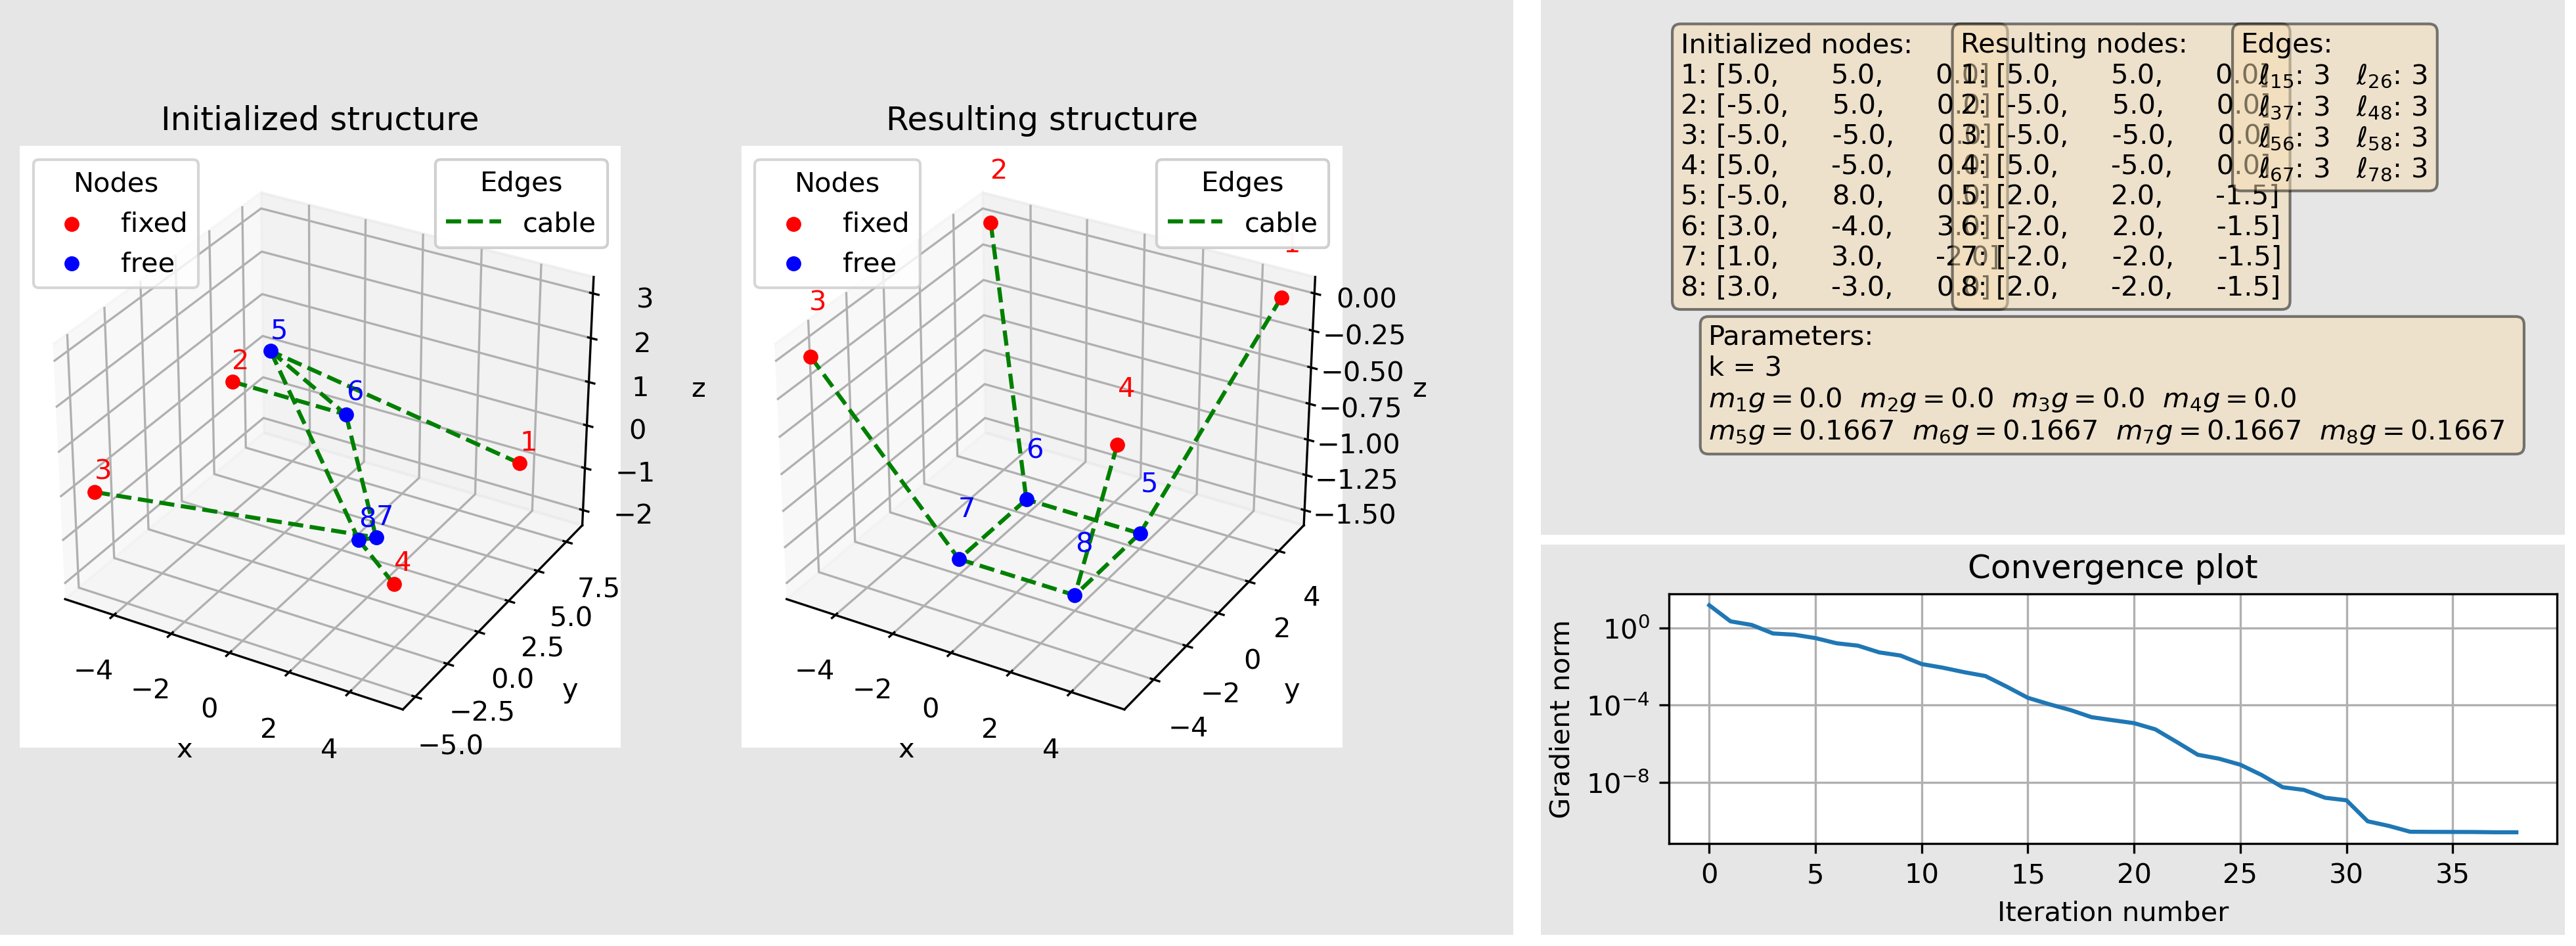

In [334]:
#Plot
plotting.main_plot(struct1, struct1_BFGS, norms1, filename="struct1.png",many_params=True)

### Test example with cables and bars, fixed nodes

##### Initializtion of the structure

In [335]:
#Making the structure
s = 0.70970
t = 9.54287

num_of_fixed_nodes = 4

nodes = np.array([[ 1,  1, 0],
                  [-1,  1, 0],
                  [-1, -1, 0],
                  [ 1, -1, 0],
                  [5,  5, 5],
                  [-5,  5, 5],
                  [-5,  -5, 6],
                  [5,  -5, 7]]).astype(np.float64)

cables = np.array([[0, 7, 8],
                   [1, 4, 8],
                   [2, 5, 8],
                   [3, 6, 8],
                   [4, 5, 1],
                   [4, 7, 1],
                   [5, 6, 1],
                   [6, 7, 1]])

bars = np.array([[0, 4, 10],
                 [1, 5, 10],
                 [2, 6, 10],
                 [3, 7, 10]])

masses = np.array([[]])

c=1
k=0.1
bar_density = 1e-6

struct2 = TS.TensegrityStruct(num_of_fixed_nodes, nodes, masses ,cables, bars, k, c, bar_density)

##### Applying BFGS

In [336]:
#BFGS
struct2_BFGS = copy.deepcopy(struct2)
norms2 = opt.BFGS(struct2_BFGS, return_norms=True)

BFGS used 306 iterations


##### Plotting results

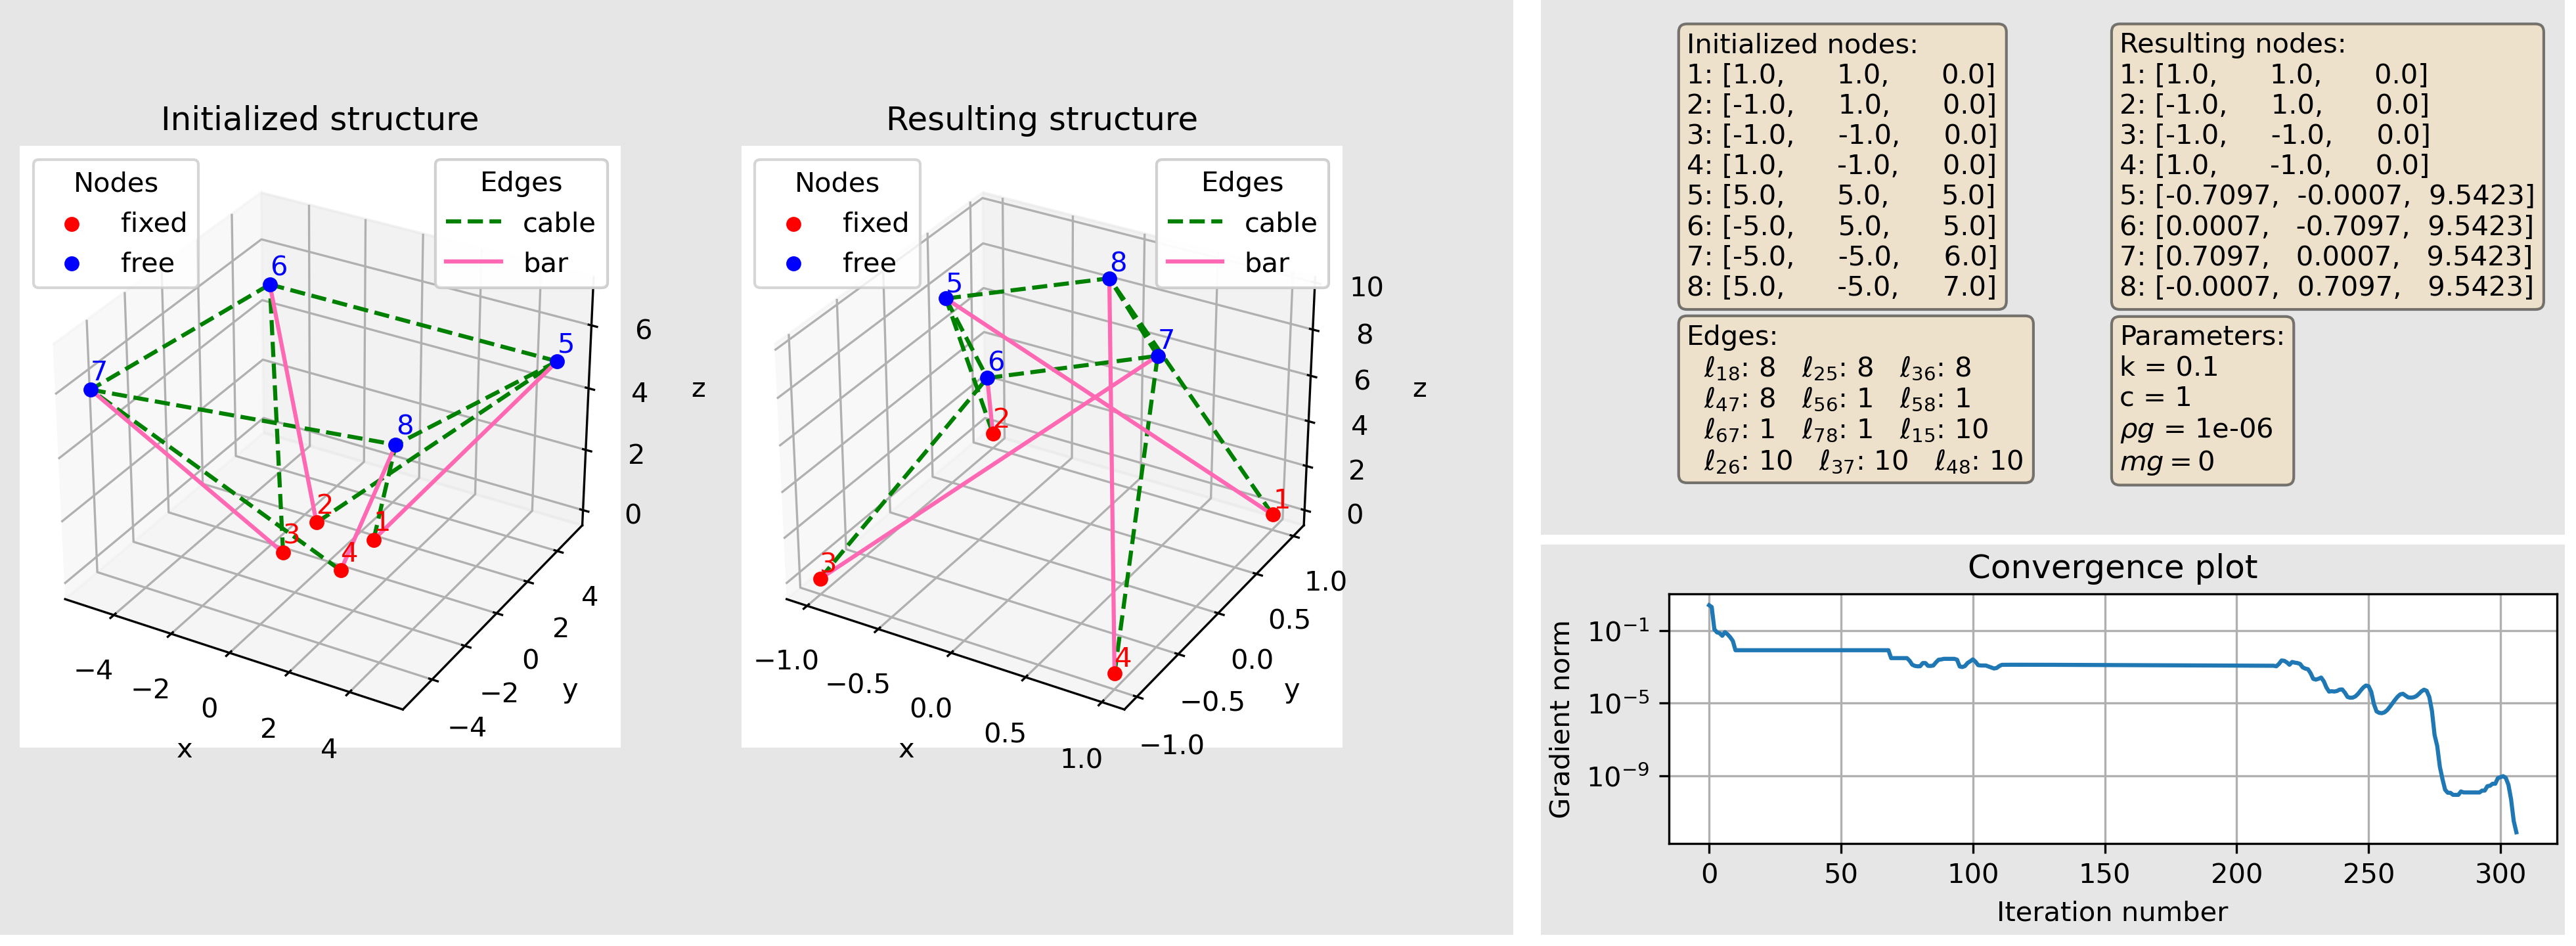

In [337]:
#Plot
plotting.main_plot(struct2, struct2_BFGS, norms2, filename="struct2.png")

### Test example of a free standing structure

##### Initializtion of the structure

In [338]:
#Making the structure
nodes = np.array([[ 1,  1, 0],
                  [-1,  1, 5],
                  [-1, -1, 0],
                  [ 1, -1, 3],
                  [ 5,  5, 10],
                  [-5,  5, 10],
                  [-5, -5, 10],
                  [ 5, -5, 10]]).astype(np.float64)

cables = np.array([[0, 7, 8],
                   [1, 4, 8],
                   [2, 5, 8],
                   [3, 6, 8],
                   [4, 5, 1],
                   [4, 7, 1],
                   [5, 6, 1],
                   [6, 7, 1],
                   [0, 1, 1],
                   [0, 3, 1],
                   [1, 2, 1],
                   [2, 3, 1]])

bars = np.array([[0, 4, 10],
                 [1, 5, 10],
                 [2, 6, 10],
                 [3, 7, 10]])

masses = np.array([[]])

c=1
k=0.1
bar_density = 1e-5

struct3 = FSS.FreeStandingStruct(nodes, masses, cables, bars, k, c, bar_density, 100)

##### Applying quadratic penalty method with BFGS

In [339]:
#Quadratic penalty method with BFGS
struct3_QPM = copy.deepcopy(struct3)
tolerances=np.array([1e-7, 1e-9, 1e-11])
norms3 = opt.quadratic_penalty_method(struct3_QPM, 1000, tolerances, maxiter_BFGS=500, return_norms = True)

BFGS used 500 iterations
BFGS used 500 iterations
BFGS used 433 iterations


##### Plotting results

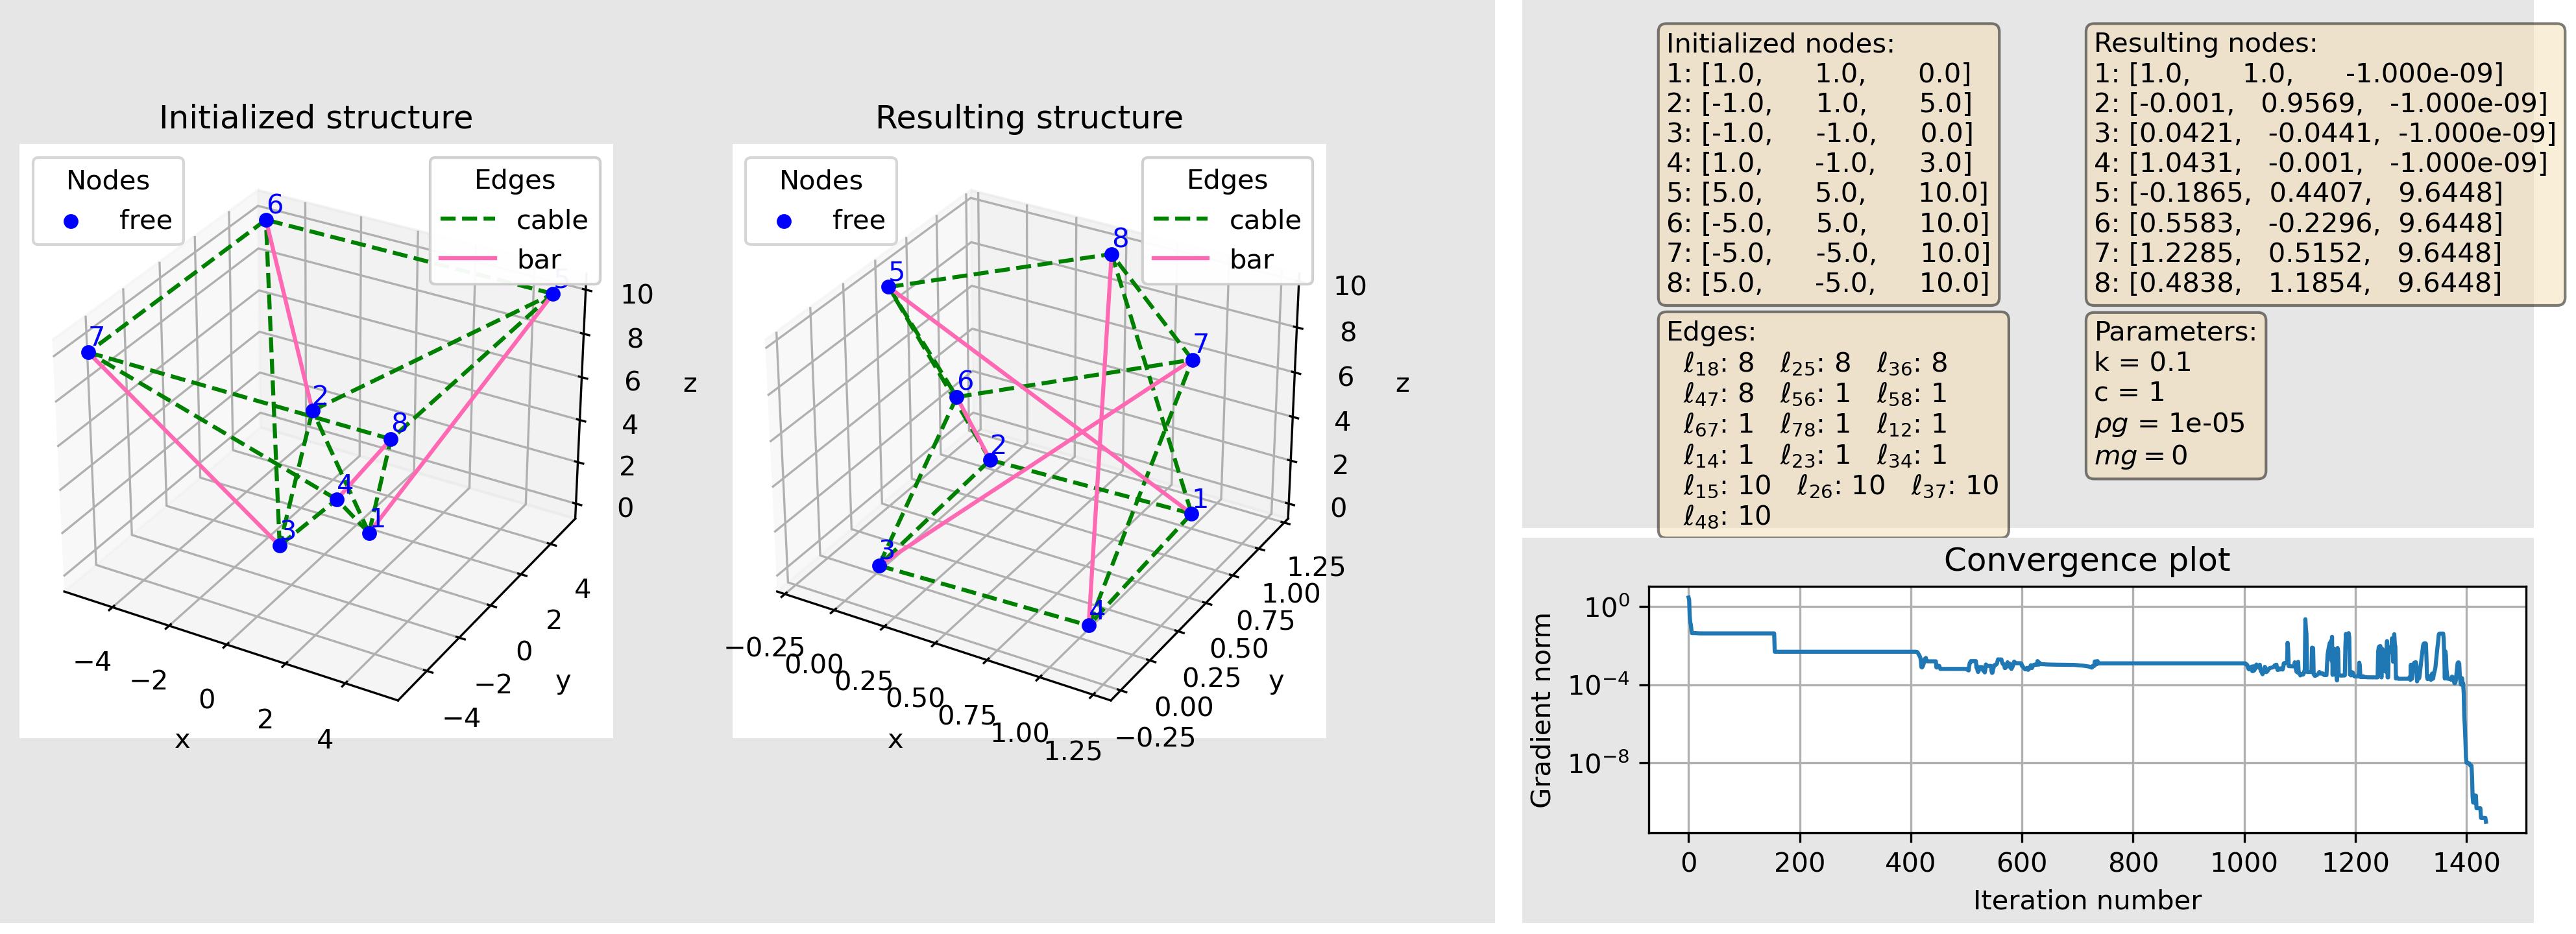

In [340]:
plotting.main_plot(struct3, struct3_QPM, norms3, filename="struct3.png")